In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [2]:
n_round = 53

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [3]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")



payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [4]:
json.dumps(payload)

'{"query": {"round": 53}}'

In [5]:
response

<Response [200]>

In [6]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0x667a6a473792e8421b0e10745c6c3a02af2d37b4',
  'nmse': 2.0339999199,
  'round': 53},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x59b7d5ac4cc835e4d29bd80fa018e867b5dbad30',
  'nmse': 1.7510000467,
  'round': 53},
 {'from_addr': '0x0026f79cadcaca0ce94c52881b1b75dc4951ba91',
  'nft_addr': '0xc63ada0470167aa08be5f4154c35ae21adb26cc2',
  'nmse': 2.6740000248,
  'round': 53},
 {'from_addr': '0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5',
  'nft_addr': '0x917824f40146813fcaa4bc8d8d5e9aaf16f8f2aa',
  'nmse': 1.9630000591,
  'round': 53},
 {'from_addr': '0x00723015a9f5c1db334da1deadb0d935df7cc87b',
  'nft_addr': '0xe2a9e33009aa965d6924a4cbf218f42b85668bca',
  'nmse': 1.5859999657,
  'round': 53},
 {'from_addr': '0x009a82148e0f2c4c41479dacc30852203fffa155',
  'nft_addr': '0xe0272a9e03155dae74da6f744c10d5008c7069e2',
  'nmse': 8.1219997406,
  'round': 53},
 {'from_addr': '0x00d27fafd2351717

In [7]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0x667a6a473792e8421b0e10745c6c3a02af2d37b4,2.034000,53
1,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x59b7d5ac4cc835e4d29bd80fa018e867b5dbad30,1.751000,53
2,0x0026f79cadcaca0ce94c52881b1b75dc4951ba91,0xc63ada0470167aa08be5f4154c35ae21adb26cc2,2.674000,53
3,0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5,0x917824f40146813fcaa4bc8d8d5e9aaf16f8f2aa,1.963000,53
4,0x00723015a9f5c1db334da1deadb0d935df7cc87b,0xe2a9e33009aa965d6924a4cbf218f42b85668bca,1.586000,53
...,...,...,...,...
1151,0xfe4c181ee7204e7d224d8b800f2e9978801e8856,0x2a0a076723594602cdcfa37bcd8ecd06398f9528,26.559999,53
1152,0xfe9758f94d157acc3595aeb36f31bf01cea0c51d,0xb5167634a2201bcf47df8920cb77d52b3682613c,1.608000,53
1153,0xff142dd4e4766091cfba78f0342c5ab75388e99a,0xedf854e87d6acb126ec166f134f10c5b047011f5,4.891000,53
1154,0xff620db01e0c9cca29b7f6e2bcc86da07b55b04a,0xcf1654e6d0d7876cf88f64aafc9c65c23308a6c9,1.508000,53


In [8]:
df = df[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_88192/3112475477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0xb25e86e9dc32f87345104db7930ad0ce03001a1b,0xa902f3f7af9b67f98a50c8718238bf4a43db6b7d,0.2624,53
1,0x334f5b52a8fd2bf0fe0079981ffacaf79f30782b,0xf2a72fe9d410055661d0c50f7859f5da9e6ade2f,0.3499,53
2,0x6b66c0d1ec77f87ab75a313ae6dd79ed081b93c8,0xbb4530a0b71a635fef4b63a2694d165225e52255,0.3876,53
3,0xb9a760af023db830e5c41a63fa45edfbdf63b46e,0x30253727529968db076acbf15b881be40082a731,0.4085,53
4,0x40819d9f8e1653771ce4ee983df894523808e14e,0xee713cb32893e3ebe9b054e793852e6f2a1ee98c,0.4146,53
...,...,...,...,...
1054,0x4653b8a783bb61e38851b1f10c956c8a68ea0522,0x06be16c4482ba4ddb68ab954330117e32a46c3f9,25610.0000,53
1055,0xada520b94a0639b2bdaa84a7306921d73c43f896,0x0c27c8a4ffef4edb4d31a09a882105d7174b0ebe,26040.0000,53
1056,0x895ba2776465e71c5dcdf06a532c52b91b35afb3,0x19fe32f736939a5c8f62a6180b71b0184bd6f493,29810.0000,53
1057,0xf86d0120872c65196acb5ebd44e744010d45c328,0x078ceb64c926eba81b961d562cc3337966fff2e4,33220.0000,53


In [9]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"]

860    7.401
Name: nmse, dtype: float64

In [10]:
df["from_addr"].nunique()

1059

In [11]:
df[(df["nmse"] < 0.99)] 

,from_addr,nft_addr,nmse,round
0,0xb25e86e9dc32f87345104db7930ad0ce03001a1b,0xa902f3f7af9b67f98a50c8718238bf4a43db6b7d,0.2624,53
1,0x334f5b52a8fd2bf0fe0079981ffacaf79f30782b,0xf2a72fe9d410055661d0c50f7859f5da9e6ade2f,0.3499,53
2,0x6b66c0d1ec77f87ab75a313ae6dd79ed081b93c8,0xbb4530a0b71a635fef4b63a2694d165225e52255,0.3876,53
3,0xb9a760af023db830e5c41a63fa45edfbdf63b46e,0x30253727529968db076acbf15b881be40082a731,0.4085,53
4,0x40819d9f8e1653771ce4ee983df894523808e14e,0xee713cb32893e3ebe9b054e793852e6f2a1ee98c,0.4146,53
...,...,...,...,...
60,0xa8ec304f3583d47afa3992731839a354e214ebca,0x5c2be1ea566160acde65d0f08dbe0a335e326387,0.8780,53
61,0x47b69c68a5b5db7eb8230ea61b8818c93df58d9a,0x9a29ab81e902af4ee1dd6121021ddc8e294d6b37,0.9183,53
62,0x05c6fdf0098be5550bb5efe36ee445081052d570,0xfdc6cf62097f9a8d3e0236ef9d2bfcdef059b263,0.9781,53
63,0x4927d7e02b42041d3888c82f97b136d5afd1c534,0x744fee6acbf57f843be4b6084e37f7158e15cdca,0.9809,53


In [12]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

98

In [13]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

65

(0.0, 10.0)

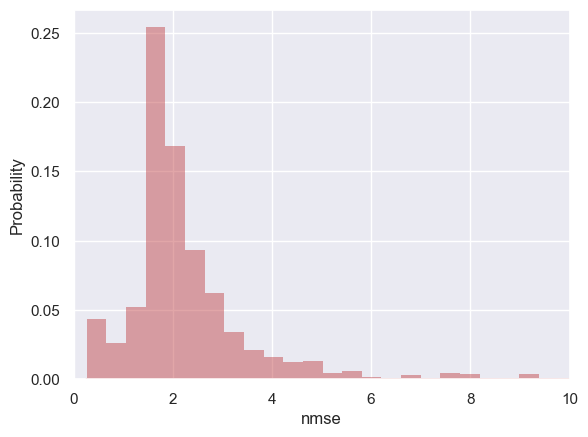

In [14]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [15]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [16]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [17]:
df[(df["nmse"] == 1)].shape[0]

0

In [18]:
df.shape

(1059, 4)